# Correlation of the happiness index and GDP using Pandas for year 2021 

<p>The study of 'Happiness' is a recurring theme in Philosophy, my academic discipline of provenance. The discipline has given me ideas (frameworks) and ways to think about these ideas (methodologies) that have helped me clarify the issue of happiness on a personal level. This is why I fully support Aristotle's vision of happiness as 'human flourishing.' What this means not only in my day-to-day, but also in the day-to-day of the other 9 trillion+ inhabitants of our planet, leaves ample room for discussion and debate.</p><img src="http://blogs.smithsonianmag.com/design/files/2013/03/smiley-face-1.jpg"></p>   

<p>But the <a href="https://worldhappiness.report/">World Happiness Report</a>, published annually by the United Nations, includes in-depth analyses of the real-world factors influencing happiness, including the relationship between GDP and happiness. Their website provides access to the latest reports, research papers, and analyses in the field of happiness and well-being.</p><p>Additionally, academic databases like Google Scholar, PubMed, and ResearchGate can help us find recent studies and articles on this topic.</p>

## 1. Loading data and data analysis framework

### Instantiating Pandas, a powerful Python-based library that we shall be leveraging to perform data transformation and analysis

In [3]:
#Access Python data analysis library
import pandas as pd

### Accessing the latest published Global GDP data by the World Economic Forum from [this site](https://ourworldindata.org/grapher/national-gdp-constant-usd-wb?tab=table) 

In [4]:
#Load the relevant data set into a Pandas DataFrame
gdp = pd.read_csv('national-gdp-constant-usd-wb.csv')
print(gdp.head())

        Entity Code  Year  GDP (constant 2015 US$)
0  Afghanistan  AFG  2002               7555185000
1  Afghanistan  AFG  2003               8222480400
2  Afghanistan  AFG  2004               8338755600
3  Afghanistan  AFG  2005               9275174000
4  Afghanistan  AFG  2006               9772083000


## 2. Exploratory data analysis

### Now that the data is loaded into a dataframe, we shall first lightly explore the data in order to determine their salient characteristics (i.e. the values, column headings, and indices) and get a glimpse of the distribution of data.

In [3]:
#Finding out the number of rows and columns
gdp.shape

(10669, 4)

In [4]:
#Findout out the column variable names
gdp.columns

Index(['Entity', 'Code', 'Year', 'GDP (constant 2015 US$)'], dtype='object')

In [6]:
# Getting some fundamental stistics about our dataset
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10669 entries, 0 to 10668
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Entity                   10669 non-null  object
 1   Code                     9890 non-null   object
 2   Year                     10669 non-null  int64 
 3   GDP (constant 2015 US$)  10669 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 333.5+ KB


### To optimize our analysis of Global GDP data 2021, we have to find out if there are missing values (and to what extent). We improve our chances of attaining clear, accurate, and comprehensive results in our analysis when we determine that our relevant data is sufficient to begin with.

In [7]:
# Checking for missing values
gdp.isna().head()

,Entity,Code,Year,GDP (constant 2015 US$)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [8]:
# Getting a tally of possible missing values for each row
# We find out that under the column 'Code' there are 779 missing values
gdp.isna().sum()

Entity                       0
Code                       779
Year                         0
GDP (constant 2015 US$)      0
dtype: int64

### There are 779 empty or missing field values under the column 'Code.' Since we've already gotten a glimpse of the first few rows of the dataframe at the outset, it stands to reason that these missing values are negligible. That is, the column 'Entity' has 0 missing values, and its field values are equivalent to the values under the neighboring column 'Code' (i.e. the former contains names of countries/nations of the world, while the latter corresponds to the respective abbreviations). 

## 3. Multivariate data analysis

### Let's first find out the _years_ covered by our data and proceed from there. 

In [12]:
# Determining the range of years under the 'Year' column using a function
def get_year_range(data_frame, year_column):
    min_year = data_frame[year_column].min()
    max_year = data_frame[year_column].max()
    return min_year, max_year

# Calling the function to get the range of years
min_year, max_year = get_year_range(gdp, 'Year')

print(f'The range of years is from {min_year} to {max_year}')

The range of years is from 2010 to 2014


### We can visually explore the relationship between 'Year' and 'GDP' by creating a histogram. In this regard, we will deploy a handy data visualization tool, matplotlib.

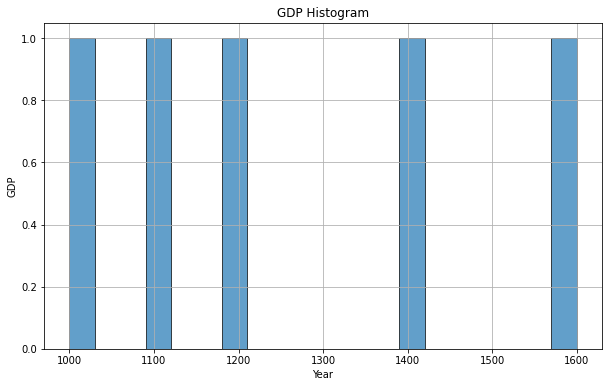

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame 'gdp' with 'Year' and 'GDP' columns
# Replace this with your actual DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014],
    'GDP': [1000, 1200, 1100, 1400, 1600]
}
gdp = pd.DataFrame(data)

# Create a scatter plot using 'Year' as x-values and 'GDP' as y-values
plt.figure(figsize=(8, 6))
plt.scatter(gdp['Year'], gdp['GDP'], color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP vs Year Scatter Plot')
plt.grid(True)
plt.show()

In [7]:
# The function filter_by_year takes a DataFrame and a year value as arguments and returns a new DataFrame 
# containing only the rows with that year value in the 'Year' column. 
# The .copy() method is used to ensure that the new DataFrame is a separate copy of the original data, not 
# just a view.
def filter_by_year(data_frame, year_value):
    filtered_data = data_frame[data_frame['Year'] == year_value].copy()
    return filtered_data

# Call the function to get a new DataFrame for the year 2021
gdp_2021 = filter_by_year(gdp, 2021)

print(gdp_2021)

                   Entity      Code  Year  GDP (constant 2015 US$)
19            Afghanistan       AFG  2021              17083574000
61                Albania       ALB  2021              13582024000
123               Algeria       DZA  2021             174201320000
143        American Samoa       ASM  2021                648340500
195               Andorra       AND  2021               2911602700
...                   ...       ...   ...                      ...
10425             Vietnam       VNM  2021             332270930000
10453  West Bank and Gaza       NaN  2021              15027100000
10515               World  OWID_WRL  2021           86852660000000
10606              Zambia       ZMB  2021              24495921000
10668            Zimbabwe       ZWE  2021              20618836000

[210 rows x 4 columns]


In [19]:
gdp_2021.head()

,Entity,Code,Year,GDP (constant 2015 US$)
19,Afghanistan,AFG,2021,17083574000
61,Albania,ALB,2021,13582024000
123,Algeria,DZA,2021,174201320000
143,American Samoa,ASM,2021,648340500
195,Andorra,AND,2021,2911602700


In [23]:
gdp_2021 = gdp_2021.sort_values('GDP (constant 2015 US$)', ascending=False)

gdp_2021.head()

,Entity,Code,Year,GDP (constant 2015 US$)
10515,World,OWID_WRL,2021,86852660000000
4262,High-income countries,NaN,2021,52776248000000
6425,Middle-income countries,NaN,2021,33232047000000
2726,East Asia and Pacific (WB),NaN,2021,27829748000000
10247,Upper-middle-income countries,NaN,2021,25157316000000


### Accessing our second data set containing data on the world happiness index for the year 2021 which was sourced from the site https://data.world/makeovermonday/2020w19-world-happiness-report-2020/workspace/file?filename=WHR20_DataForFigure2.1.xls

In [8]:
# Converting .xls format of the data into csv using a function
def xls_to_csv(input_path, output_path):
    try:
        # Read the Excel file
        xls_data = pd.read_excel(input_path)
        
        # Save the data as a CSV file
        xls_data.to_csv(output_path, index=False)
        
        print(f"Conversion successful. CSV file saved at '{output_path}'.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Providing the input .xls file path and desired output .csv file path
input_xls_file = 'WHR20_DataForFigure2.1.xls'
output_csv_file = 'happiness_2021.csv'

# Calling the function to perform the conversion
xls_to_csv(input_xls_file, output_csv_file)

Conversion successful. CSV file saved at 'happiness_2021.csv'.


In [9]:
# Loading our relevant happiness index 2021 data set as a Pandas DataFrame
# Getting a glimpse of the first few rows
happiness_2021 = pd.read_csv('happiness_2021.csv')
happiness_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [11]:
happiness_2021.info()

happiness_2021.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

(153, 20)

In [12]:
happiness_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [13]:
# Using a function to subset 'happiness_2021' DataFrame
# to only include the three columns: 'Country name', 'Ladder score', and 'Logged GDP per capita'

def shrink_dataframe(df):
    # Select the desired columns
    selected_columns = ['Country name', 'Ladder score', 'Logged GDP per capita']
    
    # Create a new DataFrame with only the selected columns
    new_df = df[selected_columns].copy()
    
    return new_df

# With 'happiness_2021' as the original DataFrame,
# we would call the function like this:

new_happiness_2021 = shrink_dataframe(happiness_2021)

In [14]:
new_happiness_2021.head()

,Country name,Ladder score,Logged GDP per capita
0,Finland,7.8087,10.639267
1,Denmark,7.6456,10.774001
2,Switzerland,7.5599,10.979933
3,Iceland,7.5045,10.772559
4,Norway,7.4880,11.087804


In [15]:
# Using a Python function to replace the column variable names 'Country name', 'Ladder score', and 
# 'Logged GDP per capita' of our downsized DataFrame called 'new_happiness_2021' with the new column variable 
# names 'Country', 'Happiness ranking', and 'GDP 2021' respectively. 
def rename_columns(df):
    # Dictionary to map old column names to new column names
    column_mapping = {
        'Country name': 'Country',
        'Ladder score': 'Happiness ranking',
        'Logged GDP per capita': 'GDP 2021'
    }
    
    # Rename the columns using the dictionary
    df.rename(columns=column_mapping, inplace=True)

# Calling the function
rename_columns(new_happiness_2021)

In [16]:
new_happiness_2021.head()

,Country,Happiness ranking,GDP 2021
0,Finland,7.8087,10.639267
1,Denmark,7.6456,10.774001
2,Switzerland,7.5599,10.979933
3,Iceland,7.5045,10.772559
4,Norway,7.4880,11.087804


### Showing the top 5 happiest countries 

In [18]:
new_happiness_2021.head(5)

,Country,Happiness ranking,GDP 2021
0,Finland,7.8087,10.639267
1,Denmark,7.6456,10.774001
2,Switzerland,7.5599,10.979933
3,Iceland,7.5045,10.772559
4,Norway,7.4880,11.087804


## C